# MNIST - Fully connected NN

A first very simple approach on fitting the MNIST dataset. We'll use a neural network with
dense layers, relu activation function and softmax.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, InputLayer, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import seaborn as sns
from pyprojroot import here

MNIST dataset loaded.
Training datasets: 60000
Test datasets: 10000


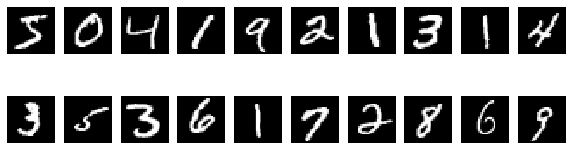

In [5]:
# import train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("MNIST dataset loaded.")
print("Training datasets:", X_train.shape[0])
print("Test datasets:", X_test.shape[0])

fig = plt.figure(figsize=(10, 3))

for i in range(20):
    fig.add_subplot(2, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")

# set datatype to float and normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Onehot encoding of the classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
def create_model(n_hidden: int = 1, n_units: int = 10, lr: float = 0.01) -> Sequential:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28,)))
    for i in range(n_hidden):
        model.add(Dense(n_units, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss=categorical_crossentropy,
        optimizer=Adam(learning_rate=lr),
        metrics=["accuracy"],
    )
    return model

accuracy = []
val_accuracy = []

# Parameter optimization with grid search

In [8]:
grid = ParameterGrid(
    {
        "n_hidden": [1, 5, 10],
        "n_units": [10, 25, 50],
        "lr": [0.01, 0.001, 0.0001],
        "n_epochs": [12, 24]
    }
)

def plot_history(history):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.grid()
    plt.legend();
    

def dump_results():
    params = [p for p in grid]
    for i in range(len(results)):
        params[i]["acccuracy"] = results[i][0]
        params[i]["val_accuracy"] = results[i][1]

    df = pd.DataFrame(params)
    df.to_csv("010_params.csv")

In [9]:
results = []
for i, p in enumerate(grid):
    print("Parameterset {0}/{1}".format(i+1, len(grid)))
    print(p)
    model = create_model(n_hidden=p["n_hidden"], n_units=p["n_units"], lr=p["lr"])

    history = model.fit(
        X_train,
        y_train,
        batch_size=64,
        epochs=p["n_epochs"],
        verbose=0,
        validation_data=(X_test, y_test),
    )
    
    acc, val_acc = history.history["accuracy"][-1], history.history["val_accuracy"][-1]
    results.append((acc, val_acc))
    print("accuracy: {0}, val_accuracy: {1}".format(acc, val_acc))
    print("")
    dump_results()

Parameterset 1/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 1, 'n_units': 10}
accuracy: 0.9309666752815247, val_accuracy: 0.9319000244140625

Parameterset 2/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 1, 'n_units': 25}
accuracy: 0.9602333307266235, val_accuracy: 0.9509000182151794

Parameterset 3/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 1, 'n_units': 50}
accuracy: 0.9781333208084106, val_accuracy: 0.9664000272750854

Parameterset 4/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 5, 'n_units': 10}
accuracy: 0.9092666506767273, val_accuracy: 0.9107000231742859

Parameterset 5/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 5, 'n_units': 25}
accuracy: 0.9626333117485046, val_accuracy: 0.9523000121116638

Parameterset 6/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 5, 'n_units': 50}
accuracy: 0.9738333225250244, val_accuracy: 0.9610000252723694

Parameterset 7/54
{'lr': 0.01, 'n_epochs': 12, 'n_hidden': 10, 'n_units': 10}
accuracy: 0.8450833559036255, val_accuracy: 0.8374999761581421

Parameterset

KeyboardInterrupt: 

In [12]:
results = pd.read_csv(here("030_results/2019-10-18_mnist_nn_01/accuracies_01.csv"), index_col=0)
results.sort_values(["val_accuracy"], ascending=False, inplace=True)
results.head()

,acccuracy,lr,n_epochs,n_hidden,n_units,val_accuracy
35,0.991883,0.001,24,10,50,0.9733
32,0.992283,0.001,24,5,50,0.9730
20,0.986000,0.001,12,1,50,0.9729
29,0.995817,0.001,24,1,50,0.9700
26,0.983233,0.001,12,10,50,0.9689


acccuracy       0.995768
lr             -0.392483
n_epochs        0.032269
n_hidden       -0.396321
n_units         0.023754
val_accuracy    1.000000
Name: val_accuracy, dtype: float64